<a href="https://colab.research.google.com/github/RamadeviKN/Student-Performance-Analysis-Using-Machine-Learning/blob/main/student_performance_support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Student_Performance.csv')
# Assuming that 'Hours_Studied' is the independent variable and 'Score' is the dependent variable
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[7]
 [4]
 [8]
 ...
 [6]
 [9]
 [7]]


In [ ]:
print(y)

[91. 65. 45. ... 74. 95. 64.]


In [ ]:
y_reshaped = y.reshape(len(y),1)

In [ ]:
print(y_reshaped)

[[ 1.86216688]
 [ 0.50881766]
 [-0.5322202 ]
 ...
 [ 0.9772847 ]
 [ 2.07037446]
 [ 0.45676577]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y_reshaped=sc_y.fit_transform(y_reshaped)
print(X)
print(y_reshaped)

[[ 0.77518771]
 [-0.38348058]
 [ 1.16141048]
 ...
 [ 0.38896495]
 [ 1.54763324]
 [ 0.77518771]]
[[ 1.86216688]
 [ 0.50881766]
 [-0.5322202 ]
 ...
 [ 0.9772847 ]
 [ 2.07037446]
 [ 0.45676577]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
y_pred = regressor.predict(sc_X.transform([[60.0]])).reshape(-1,1)
y_pred_inverse = sc_y.inverse_transform(y_pred)

In [ ]:
print(y_pred)
print(y)

[[-0.04014267]]
[[ 1.86216688]
 [ 0.50881766]
 [-0.5322202 ]
 ...
 [ 0.9772847 ]
 [ 2.07037446]
 [ 0.45676577]]


## Calculate R Squared Values

In [ ]:
#r2 = r2_score(y_reshaped, y_pred)
#print(f'Training R-squared: {r2}')

ValueError: Found input variables with inconsistent numbers of samples: [10000, 1]

## Visualising the SVR results

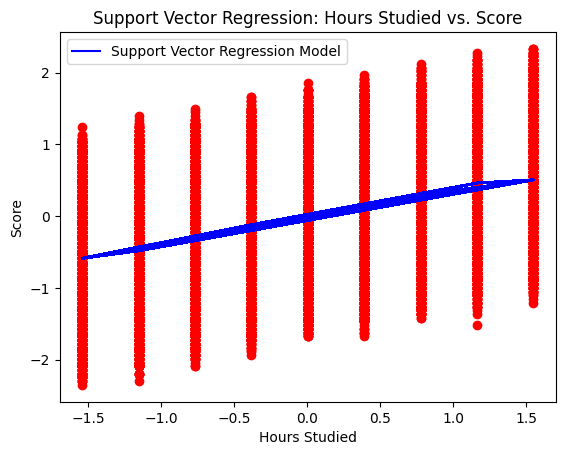

In [ ]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y_reshaped),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue',label='Support Vector Regression Model')
plt.title('Support Vector Regression: Hours Studied vs. Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-58-58e0817c72b5>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid=np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)


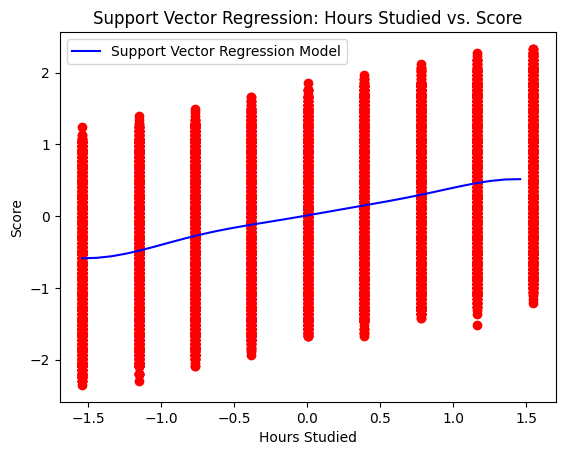

In [ ]:
X_grid=np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y_reshaped),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue',label='Support Vector Regression Model')
plt.title('Support Vector Regression: Hours Studied vs. Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.show()